## Group 1:  San Francisco

We investigate what skills are important in each market but most importantly "why" they might be.  Is there anything else different from New York vs San Francisco that we can draw on?


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# This is for UX/UI Interaction Designers - SF
indeed_sf_data = pd.read_csv('indeed_ux_sf.csv')

In [6]:
indeed_sf_df = pd.DataFrame(indeed_sf_data)

In [7]:
indeed_sf_df.head(3)

,title,summary
0,"User Experience Researcher, Uber Freight",Our research will make the process of moving r...
1,Interaction Designer,\nWe follow a simple but vital premise on UX t...
2,Design,\nExperience collaborating with UX Designers/R...


In [8]:
title1= indeed_sf_df['title'][0]

In [9]:
title1

'User Experience Researcher, Uber Freight'

In [10]:
summary1  = indeed_sf_df['summary'][0]

In [11]:
summary1

'Our research will make the process of moving real assets and real people safer and more efficient now, and in the decades to come.Uber ATG UX Research Team is...'

In [12]:
indeed_sf_df.shape

(444, 2)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cvec1 = CountVectorizer()
cvec1.fit(indeed_sf_df['summary'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [14]:
df1  = pd.DataFrame(cvec1.transform(indeed_sf_df['summary']).todense())

In [15]:
df1.transpose().sort_values(0, ascending=False).head(10).transpose().head(3)

,44,764,775,915,1014,501,615,635,971,209
0,3,2,2,2,1,1,1,1,1,1
1,2,0,0,1,0,0,0,0,2,0
2,3,0,0,0,0,0,0,0,1,0


In [16]:
X = cvec1.fit_transform(indeed_sf_df['summary'])

In [17]:
y = indeed_sf_df['title'].values

In [18]:
X.shape, y.shape

((444, 1034), (444,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
df_predict = logreg.predict(X_test)

In [23]:
df_predict[13]

'Summer 2017 UI/UX Intern - GameSpot'

In [24]:
df_score = logreg.score(X_test, y_test)

In [25]:
df_score

0.6966292134831461

In [26]:
# Now w more discrimination, splitting data more carefully

In [27]:
# set ngram_range up to 3, to catch phrases like 'nat lang proc'
cvec2 = CountVectorizer(stop_words = 'english', ngram_range=(1,3))

In [28]:
indeed_sf_df['title']= indeed_sf_df['title'].map(lambda x: x.strip())

In [29]:
indeed_sf_df['summary'] = indeed_sf_df['summary'].map(lambda x: x.strip())

In [30]:
indeed_sf_df['ux_ui_designer'] = indeed_sf_df['title'].map(lambda x: 1 if 'UX/UI designer'
                                in x.lower() else 0)

In [31]:
#indeed_sf_df['ux_ui_designer']

In [32]:
indeed_sf_df['interaction_designer'] = indeed_sf_df['title'].map(lambda x: 1 if 
                            'interaction designer' in x.lower() else 0)

In [33]:
#indeed_sf_df['interaction_designer']

In [34]:
X2 = cvec2.fit_transform(indeed_sf_df['summary'])

In [35]:
y2 =  indeed_sf_df['interaction_designer']

In [36]:
y2.shape, X2.shape

((444,), (444, 5229))

In [37]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.4)

In [38]:
logreg2 = LogisticRegression()

In [39]:
logreg2.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
df_predict2 = logreg2.predict(X_test2)

In [41]:
logreg2.score(X_test2, y_test2)

1.0

In [42]:
X3  = pd.DataFrame(cvec2.fit_transform(indeed_sf_df.summary).todense(),
            columns=cvec2.get_feature_names())

X3.transpose().sort_values(0, ascending=False).head(100).transpose().head(5)

,research,real,uber,come uber atg,process moving,process moving real,research team,research make process,ux research,research make,...,product designer,product designer able,product designer bring,product designer committed,process looking,process believe iterative,product designer utilize,10,product designer ve,profile
0,2,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X3.columns

Index([u'10', u'10 engineers', u'10 engineers 100', u'100', u'100 people',
       u'100 people location', u'107', u'12', u'12 months', u'12 months job',
       ...
       u'years ux ui', u'years work', u'years work experience', u'yelp',
       u'yelp conquer', u'yelp conquer challenging', u'york', u'zendesk',
       u'zendesk looking', u'zendesk looking product'],
      dtype='object', length=5229)

In [44]:
interaction_designer_dic = {
                    'research':0,
                    'uber':0,
                    'yelp':0,
                    'years ux ui':0,
                    'process moving':0,
                    'research team':0,
                    'ux research':0,
                    'product designer':0,
                    'process looking':0,
                    'profile':0
}

for c in X3.columns:
    for key in interaction_designer_dic:
        if key in c.lower():
            interaction_designer_dic[key] += 1

print interaction_designer_dic

{'uber': 6, 'profile': 8, 'product designer': 36, 'yelp': 6, 'research team': 2, 'ux research': 20, 'years ux ui': 1, 'process looking': 4, 'process moving': 3, 'research': 102}


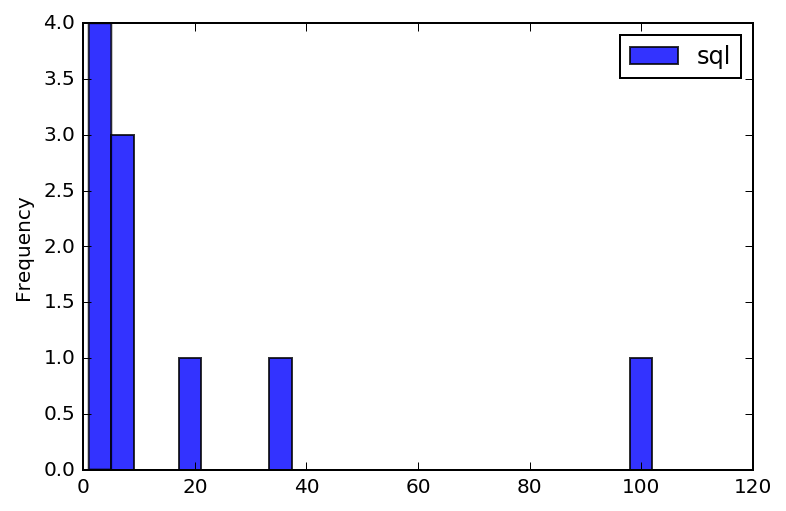

In [45]:
ax = pd.DataFrame({'sql': interaction_designer_dic}).plot(kind='hist', bins=25, alpha=0.8)
plt.show()

In [46]:
interaction_designer_df = pd.DataFrame.from_dict(interaction_designer_dic.items())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11db37810>]], dtype=object)

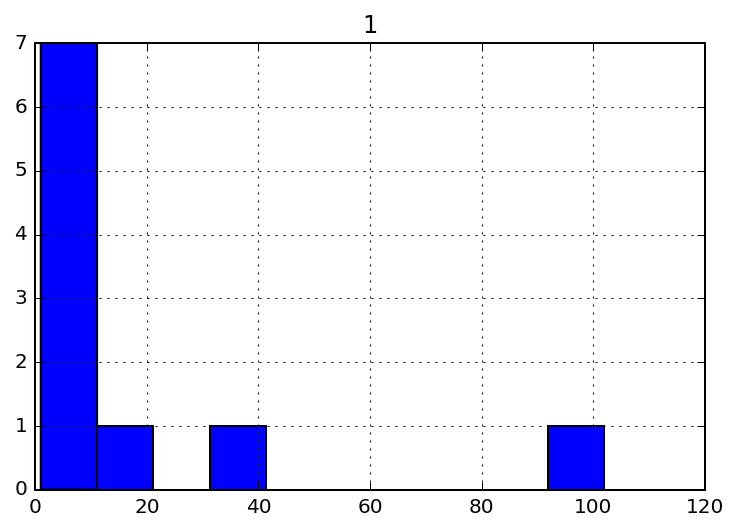

In [47]:
interaction_designer_df.hist()

## Group 2:  New York

We look now at the New York data. 

In [48]:
# This is for UX/UI Interaction Designers - NY
indeed_ny_data = pd.read_csv('indeed_ux_ny.csv')

In [49]:
indeed_ny_df = pd.DataFrame(indeed_ny_data)

In [50]:
indeed_ny_df.head(3)

,title,summary
0,Service Experience Designer,Service Experience Designer*. As a Service Exp...
1,User Experience Designer - Data Distribution a...,\nThis position is for a thoughtful UX Designe...
2,UX Designer,\nCollaborate with an Interaction Designer to ...


In [51]:
title2=indeed_ny_df['title'][0]

In [52]:
title2

'Service Experience Designer'

In [53]:
summary2  = indeed_ny_df['summary'][0]

In [54]:
summary2

'Service Experience Designer*. As a Service Experience Designer You Will*. Neighborhood Trust seeks a Service Experience Designer to join our Programs & Business...'

In [55]:
indeed_ny_df.shape

(240, 2)

In [56]:
cvec3 = CountVectorizer()
cvec3.fit(indeed_ny_df['summary'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [57]:
df3  = pd.DataFrame(cvec3.transform(indeed_ny_df['summary']).todense())

In [58]:
df3.transpose().sort_values(0, ascending=False).head(10).transpose().head(3)

,852,361,253,643,59,970,113,757,1052,984
0,3,3,3,1,1,1,1,1,1,1
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,2,0,0,0,0


In [59]:
XX = cvec3.fit_transform(indeed_ny_df['summary'])

In [60]:
yy = indeed_ny_df['title'].values

In [61]:
XX.shape, yy.shape

((240, 1076), (240,))

In [62]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.4)

In [63]:
logreg1 = LogisticRegression()

In [64]:
logreg1.fit(XX_train, yy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
df_predict1 = logreg1.predict(XX_test)

In [66]:
df_predict1[3]

'UX Designer'

In [67]:
df_score1 = logreg1.score(XX_test, yy_test)

In [68]:
df_score1

0.16666666666666666

In [69]:
cvec4 = CountVectorizer(stop_words = 'english', ngram_range=(1,3))

In [70]:
indeed_ny_df['title']= indeed_ny_df['title'].map(lambda x: x.strip())

In [71]:
indeed_ny_df['summary'] = indeed_ny_df['summary'].map(lambda x: x.strip())

In [72]:
indeed_ny_df['interaction_designer'] = indeed_ny_df['title'].map(lambda x: 1 if 
                            'interaction designer' in x.lower() else 0)

In [73]:
X4 = cvec4.fit_transform(indeed_ny_df['summary'])

In [74]:
y4 =  indeed_ny_df['interaction_designer']

In [75]:
y4.shape, X4.shape

((240,), (240, 5450))

In [76]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.4)

In [77]:
logreg4 = LogisticRegression()

In [78]:
logreg4.fit(X_train4, y_train4)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
df_predict4 = logreg4.predict(X_test4)

In [80]:
logreg4.score(X_test4, y_test4)

0.96875

In [81]:
X5  = pd.DataFrame(cvec4.fit_transform(indeed_ny_df.summary).todense(),
            columns=cvec4.get_feature_names())

X5.transpose().sort_values(0, ascending=False).head(100).transpose().head(5)

,service experience,designer,experience,experience designer,service,service experience designer,neighborhood trust seeks,neighborhood,trust,trust seeks,...,product innovation tweaking,product designers,product innovation,product gets creative,product gets,product engineering establish,product engineering,product development process,product development,product designers researchers
0,3,3,3,3,3,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
for c in X5.columns:
    for key in interaction_designer_dic:
        if key in c.lower():
            interaction_designer_dic[key] += 1

print interaction_designer_dic

{'uber': 6, 'profile': 8, 'product designer': 72, 'yelp': 6, 'research team': 7, 'ux research': 34, 'years ux ui': 1, 'process looking': 4, 'process moving': 3, 'research': 189}


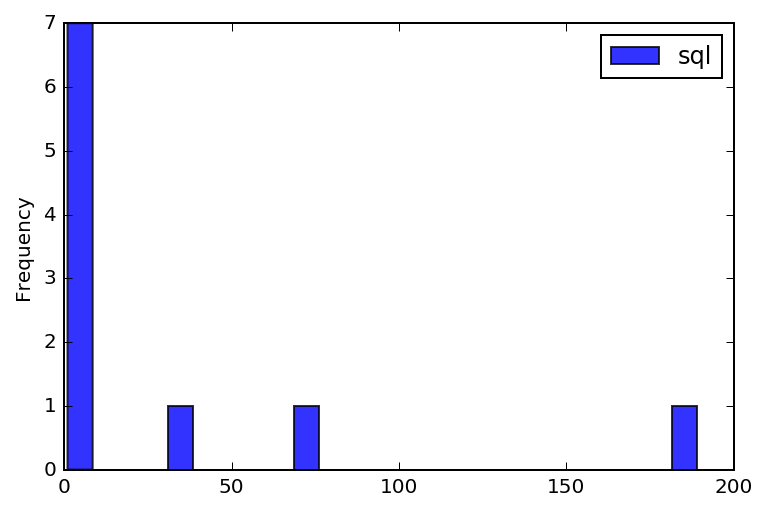

In [83]:
ax = pd.DataFrame({'sql': interaction_designer_dic}).plot(kind='hist', bins=25, alpha=0.8)
plt.show()

In [84]:
interaction_designer_df = pd.DataFrame.from_dict(interaction_designer_dic.items())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11855b6d0>]], dtype=object)

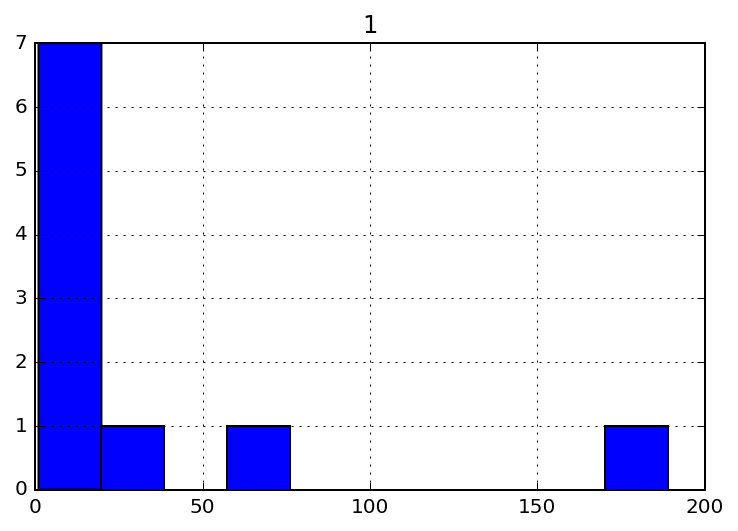

In [85]:
interaction_designer_df.hist()